#Getting Started

In [ ]:
# Install imblearn library (https://imbalanced-learn.org/stable/) for handling imbalanced data set.
!pip install imblearn

# Install graphviz library (https://pypi.org/project/graphviz/) for visualizing the decision tree.
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [ ]:
# Load Pandas library and load the dataset
import pandas as pd
df = pd.read_csv("data-employee-recruitment.csv")

In [ ]:
df.head()

,enrollee_id,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,14569,0.704,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,71,1.0
1,10557,0.594,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,217,1.0
2,14095,0.596,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,12,1.0
3,16300,0.614,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,20,1.0
4,14550,0.534,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,52,1.0


A company is looking for potential candidates from a pool of training program attendants. The dataset contains attendant background (demographics, current company, i.e., data features) and whether he or she is looing for a job change (data label). The company wants to build a prediction model using this dataset. Here follows the data dictionary:

* enrollee_id : unique ID for candidate
* city_development_index : developement index of the city (scaled)
* gender: gender of candidate
* relevent_experience: relevant experience of candidate
* enrolled_university: type of university course enrolled if any
* education_level: education level of candidate
* major_discipline: education major discipline of candidate
* experience: candidate's total experience in years
* company_size: number of employees in the current company of candidate
* company_type : Type of current employer
* last_new_job: difference in years between previous job and current job
* training_hours: training hours completed
* target value: 0 – not looking for job change, 1 – looking for a job change

In [ ]:
df.shape

(2135, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2135 entries, 0 to 2134
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2135 non-null   int64  
 1   city_development_index  2135 non-null   float64
 2   gender                  2135 non-null   object 
 3   relevent_experience     2135 non-null   object 
 4   enrolled_university     2135 non-null   object 
 5   education_level         2135 non-null   object 
 6   major_discipline        2135 non-null   object 
 7   experience              2135 non-null   object 
 8   company_size            2135 non-null   object 
 9   company_type            2135 non-null   object 
 10  last_new_job            2135 non-null   object 
 11  training_hours          2135 non-null   int64  
 12  target                  2135 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 217.0+ KB


the data has no null data sample


#Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f686b248550>,
      dtype=object)

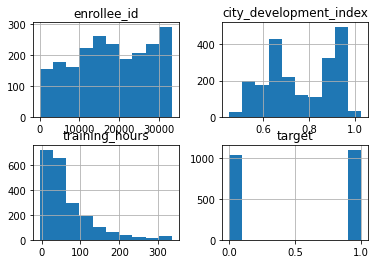

In [ ]:
df.hist()

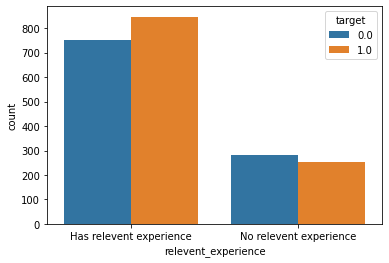

In [ ]:
sns.countplot(data=df, x="relevent_experience", hue="target")

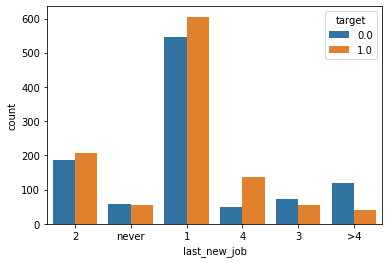

In [ ]:
sns.countplot(data=df, x="last_new_job", hue="target")

it seems like people who have big gap between the last and the new job is less likely to look for a job change

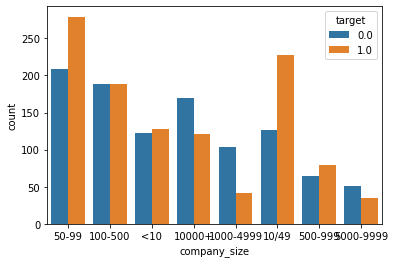

In [ ]:
sns.countplot(data=df, x="company_size", hue="target")

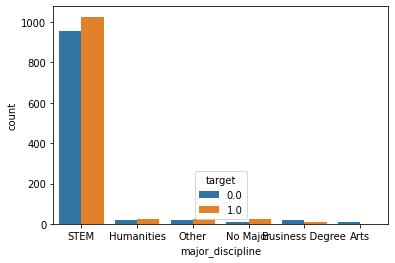

In [ ]:
sns.countplot(data=df, x="major_discipline", hue="target")

We can see that most of the candidates have STEM as their major

#Pre-processing Data

In [ ]:
data = df.copy()     # Create a copy of the data frame

In [ ]:
#drop candidate ID
data.drop(columns=['enrollee_id'], inplace=True) 

##Encode categorical data

In [ ]:
feature_names = data.columns.tolist() #get the list of all columns in the dataframe
feature_names

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [ ]:
feature_names = [
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'city_development_index',
 'training_hours',
 'target']

data = data[feature_names] #rearrange the column so that all categorical columns are on the left of the dataframe
data.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,Male,Has relevent experience,Full time course,Graduate,STEM,2,50-99,Pvt Ltd,2,0.704,71,1.0
1,Female,Has relevent experience,Full time course,Masters,STEM,9,50-99,Early Stage Startup,never,0.594,217,1.0
2,Male,Has relevent experience,Part time course,Graduate,Humanities,2,100-500,Pvt Ltd,2,0.596,12,1.0
3,Male,Has relevent experience,Full time course,Masters,STEM,4,50-99,Pvt Ltd,1,0.614,20,1.0
4,Male,No relevent experience,Full time course,Graduate,STEM,<1,50-99,Early Stage Startup,1,0.534,52,1.0


In [ ]:
#encode categorical data
from sklearn.preprocessing import LabelEncoder #import LabelEncoder
loc_encoder = LabelEncoder()

for i in range(9): #encode all categorical value
  col = feature_names[i]
  data[col] = loc_encoder.fit_transform(data[col])

data.head()

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,training_hours,target
0,1,0,0,0,5,11,4,5,1,0.704,71,1.0
1,0,0,0,1,5,19,4,0,5,0.594,217,1.0
2,1,0,1,0,2,11,1,5,1,0.596,12,1.0
3,1,0,0,1,5,14,4,5,0,0.614,20,1.0
4,1,1,0,0,5,20,4,0,0,0.534,52,1.0


##Split train and test set

In [ ]:
# Drop the column 'target' because it is the data label
X = data.drop(columns=["target"])

# Assign data label to to variable 'y'
y = data.target

In [ ]:
# Load libraries
from sklearn.model_selection import train_test_split, GridSearchCV

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, random_state=1, test_size=0.2)

##Deal with imbalanced dataset

In [ ]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))       

Before oversampling: (1708, 11)
(array([0., 1.]), array([836, 872]))


the data is not very imbalanced but let apply oversampling method to balance them

In [ ]:
# Apply oversampling method for label '1' (SMOTE will generate samples having label '1' such that the number of samples is equal to label 'y' in the training set).
# Imbalanced-learn (imported as imblearn) provides tools when dealing with classification with imbalanced classes.
# Reference: https://imbalanced-learn.org/
from imblearn.over_sampling import SMOTE     # Load the SMOTE library
smote = SMOTE(random_state=5)                # Initialize SMOTE
X_train_oversampling, y_train_oversampling = smote.fit_resample(X_train, y_train)     # Oversample label '0' (minority class) in the training set

In [ ]:
# Before oversampling
print("Before oversampling: " + str(X_train.shape))
print(np.unique(y_train, return_counts=True))                  # Print number of labels, label '0' dominates '1' 

# After oversampling
print("After oversampling: " + str(X_train_oversampling.shape))
print(np.unique(y_train_oversampling, return_counts=True))     # Print number of labels, now label '0' and '1' have the same number of labels.

Before oversampling: (1708, 11)
(array([0., 1.]), array([836, 872]))
After oversampling: (1744, 11)
(array([0., 1.]), array([872, 872]))


#Train the model

##Build a decision tree

In [ ]:
# Import GridSearchCV for finding the best hyper-parameter set.
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [3, 5],                           # Maximum depth of the tree
         "min_samples_split": [4, 8]}                   # Stop splitting condition.

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [ ]:
# Run the search on oversampled training data samples.
grid_search.fit(X_train_oversampling, y_train_oversampling)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 5],
                         'min_samples_split': [4, 8]})

In [ ]:
# Best set of hyper-parameters found after searching
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 8}

In [ ]:
# Build a decision tree model pipeline from the best set of hyper-parameters found
model_dt = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'], max_depth=grid_search.best_params_['max_depth'], min_samples_split=grid_search.best_params_['min_samples_split'])

In [ ]:
# Train the decision tree model
model_dt.fit(X_train_oversampling, y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=8)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_dt.predict(X_test)

print(classification_report(y_test, pred_y))

# Note 1: macro avg = (precision_0 + precision_1) / 2
# Note 2: weighted avg = (support_0 * precision_0 + support_1 * precision_1) / number_of_samples

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       199
         1.0       0.86      0.78      0.82       228

    accuracy                           0.81       427
   macro avg       0.82      0.82      0.81       427
weighted avg       0.82      0.81      0.82       427



##Build a random forest

In [ ]:
# Building a RandomForest is similar to building a decision tree, but there is an additional hyper-parameter called n_estimators which is the number of trees in the forest.
from sklearn.ensemble import RandomForestClassifier

params = {"criterion": ["gini", "entropy"],             # Criterion to evaluate the purity.
         "max_depth": [7, 9, 11],                           # Maximum depth of the tree
         "min_samples_split": [8, 12, 16]}                   # Stop splitting condition.

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(n_estimators=10, n_jobs=10), param_grid=params, cv= 5) # Number of trees in the forest is 10

# Run the search on oversampled training data samples.
grid_search_rf.fit(X_train_oversampling, y_train_oversampling)     # Train the RandomForest

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10, n_jobs=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [7, 9, 11],
                         'min_samples_split': [8, 12, 16]})

In [ ]:
# Best set of hyper parameters of the Random Forest
grid_search_rf.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 8}

In [ ]:
# Build a Random Forest model pipeline from the best set of hyper-parameters found
model_rf = RandomForestClassifier(n_estimators=10, random_state=1, criterion=grid_search_rf.best_params_['criterion'], max_depth=grid_search_rf.best_params_['max_depth'], min_samples_split=grid_search_rf.best_params_['min_samples_split'])     # Initia

In [ ]:
# Train the Random Forest model
model_rf.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_split=8,
                       n_estimators=10, random_state=1)

In [ ]:
# Calculate some evaluation metrics: precision, recall, f1-score. 'Support' is the number of actual occurrences of the class in the dataset.
from sklearn.metrics import classification_report

# Make prediction on the original test set (after training on the over-sampled training set).
pred_y = model_rf.predict(X_test)

print(classification_report(y_test, pred_y))

# Note: theoretically saying, there is no guarantee that the Random Forest is alsways better than the Decision Tree, i.e., the model ensembling is not always better than a single model in general.

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       199
         1.0       0.87      0.86      0.87       228

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



#Feature Importance

gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.014015
education_level           0.000000
major_discipline          0.000000
experience                0.024504
company_size              0.027132
company_type              0.008961
last_new_job              0.003555
city_development_index    0.916326
training_hours            0.005508
dtype: float64


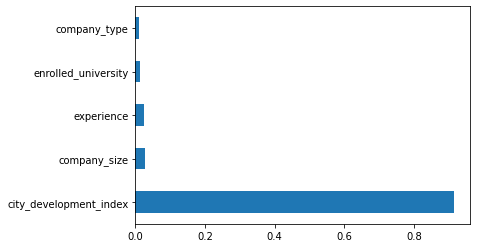

In [ ]:
# Print the importance level of each feature
weights = model_dt.feature_importances_     # Feature importance scores.
cols = X.columns                            # Corresponding names of important features.
feature_importances = pd.Series(weights, index=cols)     # Generate Series containing importance level
print(feature_importances)

# Plot the five most important features 
feature_importances.nlargest(5).plot(kind="barh")

#Visualize the tree

In [ ]:
# Visualize the tree. Note: to run dot command, we have to install 'graphviz'
from sklearn import tree
tree.export_graphviz(decision_tree=model_dt, out_file='classification-tree.dot', feature_names=X.columns)     # Save model as 'classification-tree.dot'
from subprocess import call
call(['dot', '-Tpng', 'classification-tree.dot', '-o', 'classification-tree.png', '-Gdpi=300'])        # Convert the model to an image

0

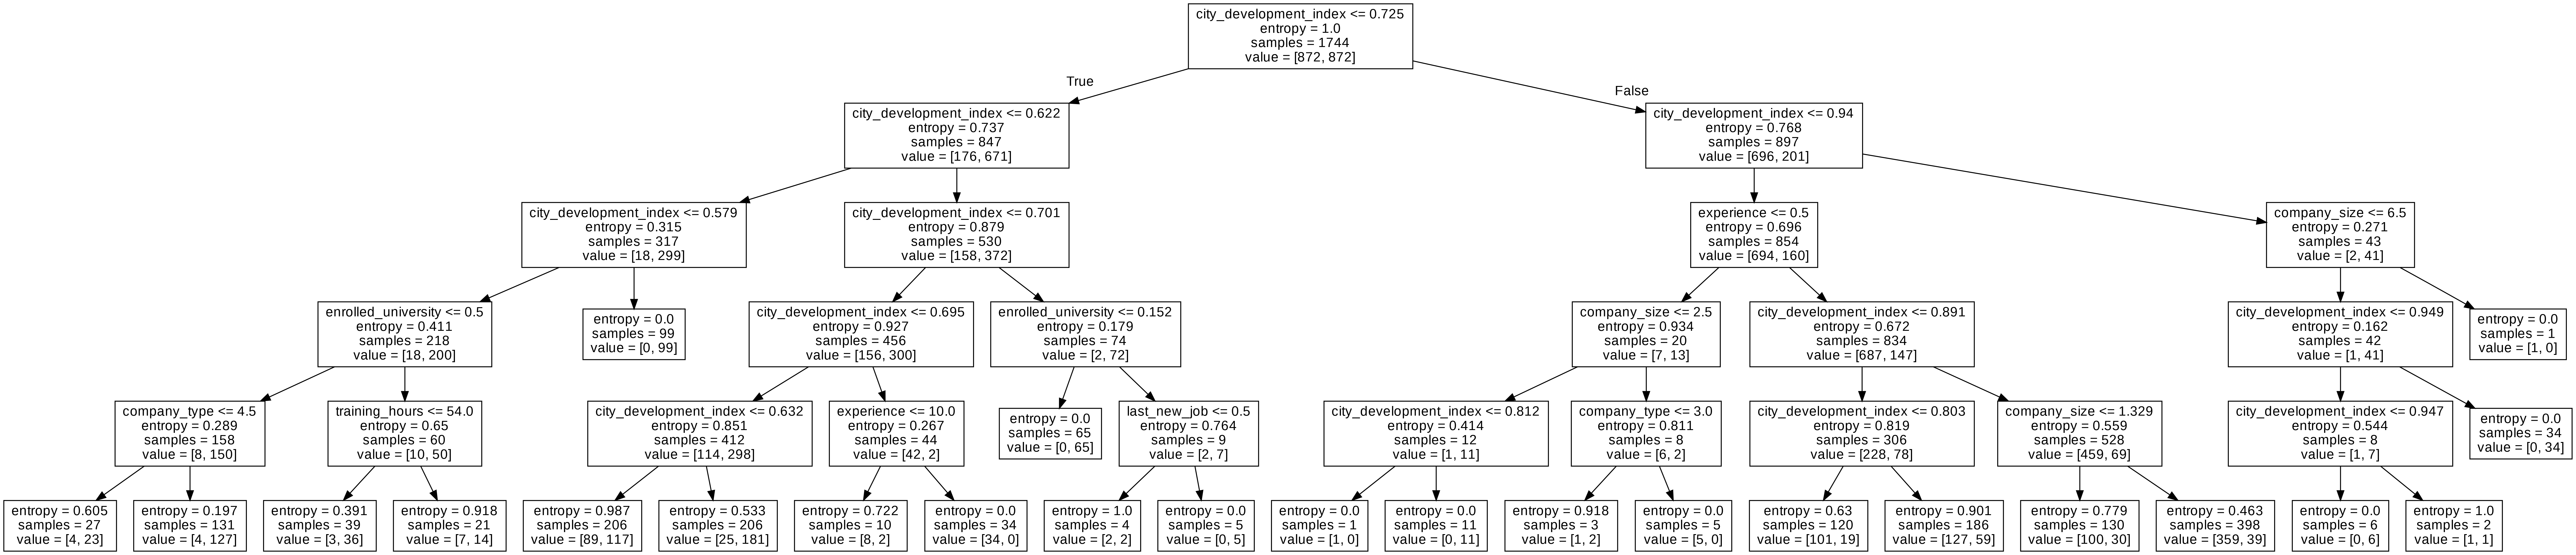

In [ ]:
from IPython.display import Image
Image(filename = 'classification-tree.png')     # Load and display file 'classification-tree.png'